<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Exploratory Data Analysis (EDA) Project 



---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [294]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import bokeh 
plt.style.use('fivethirtyeight')
import scipy


%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [315]:
import csv 
with open('sat_scores.csv') as satfile: 
    readCSV = csv.reader(satfile, delimiter=',')
    state_list = [] 
    rate_list = [] 
    verbal_list = [] 
    math_list = [] 
    for row in readCSV:
        state_list.append(row[0])
        rate_list.append(row[1])
        verbal_list.append(row[2])
        math_list.append(row[3])

In [318]:
del state_list[0]
del rate_list[0]
del verbal_list[0]
del math_list[0]

In [320]:
sat_dict = {'State': state_list,
           'Rate': rate_list,
           'Verbal': verbal_list, 
           'Math': math_list}

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
sat_df = pd.read_csv('sat_scores.csv')

In [325]:
sat_dict = pd.DataFrame(sat_dict)

In [321]:
sat_df.dtypes

State               object
Rate                 int64
Verbal               int64
Math                 int64
Score_Difference     int64
dtype: object

In [326]:
sat_dict.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
sat_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [7]:
sat_df.shape

(52, 4)

In [12]:
sat_df.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [20]:
sat_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0.5, 0, 'Math Scores by State')

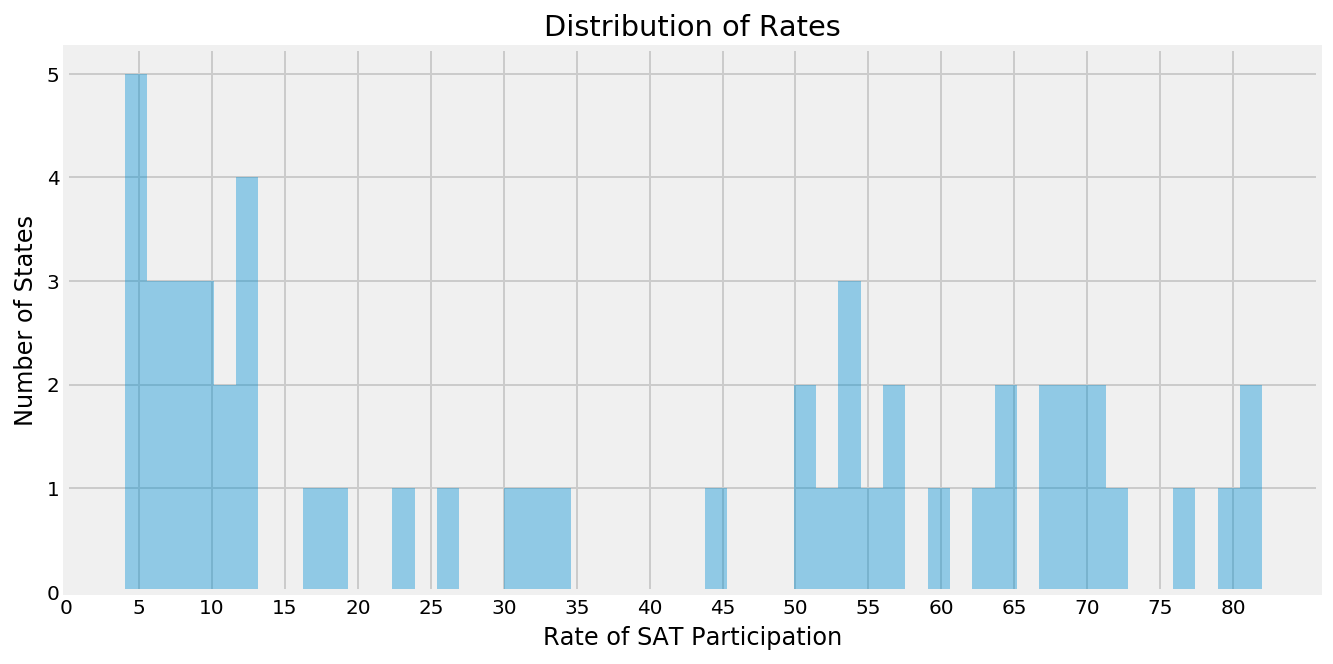

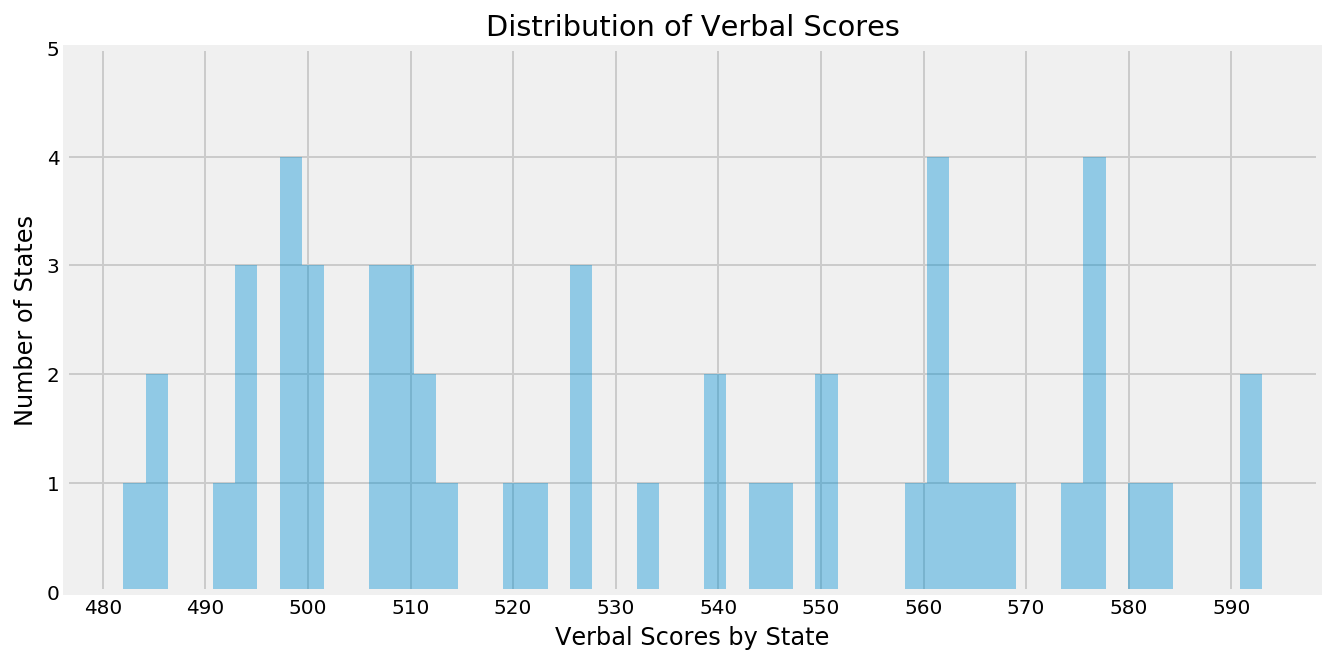

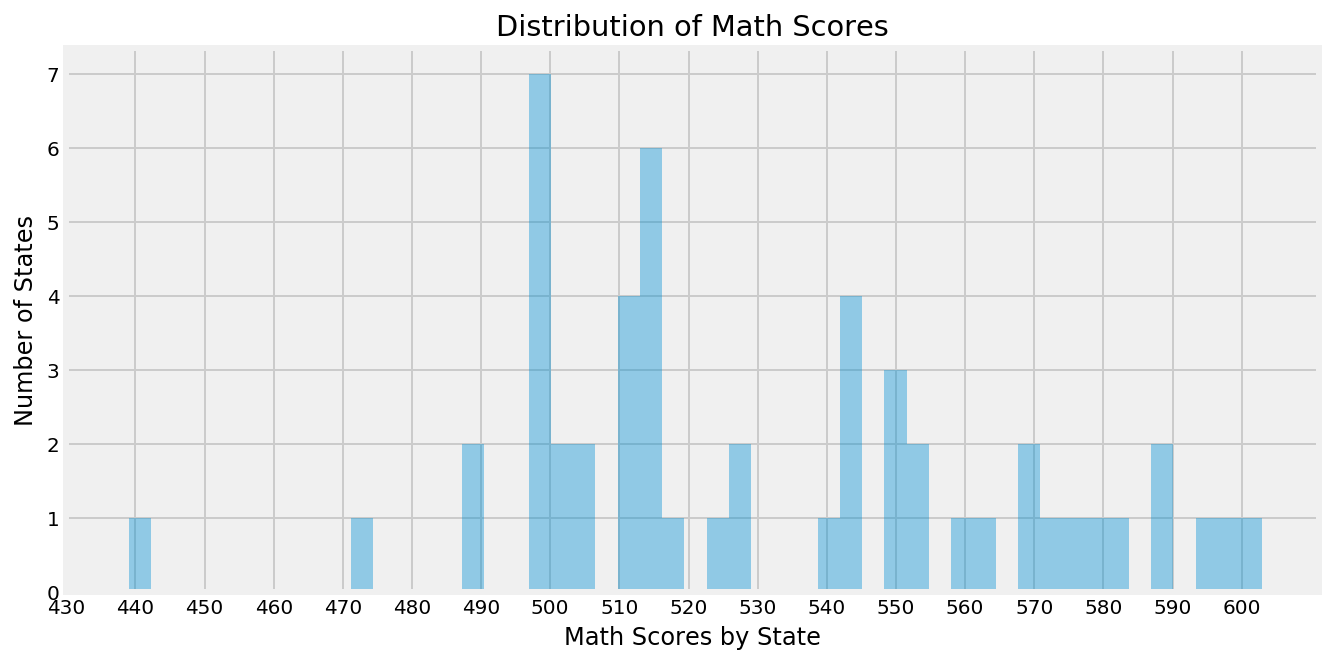

In [62]:
plt.figure(figsize=(10,5))
sns.distplot(sat_df['Rate'], kde=False, bins=51)
axes = plt.gca()
axes.set_xticks(np.arange(0, 85, step=5))
axes.set_yticks(np.arange(0,6, step=1))
axes.set_title('Distribution of Rates')
axes.set_ylabel('Number of States')
axes.set_xlabel('Rate of SAT Participation')

plt.figure(figsize=(10,5))
sns.distplot(sat_df['Verbal'], kde=False, bins=51)
axes = plt.gca()
axes.set_xticks(np.arange(480, 600, step=10))
axes.set_yticks(np.arange(0,6, step=1))
axes.set_title('Distribution of Verbal Scores')
axes.set_ylabel('Number of States')
axes.set_xlabel('Verbal Scores by State')

plt.figure(figsize=(10,5))
sns.distplot(sat_df['Math'], kde=False, bins=51)
axes = plt.gca()
axes.set_xticks(np.arange(430, 610, step=10))
axes.set_yticks(np.arange(0,8, step=1))
axes.set_title('Distribution of Math Scores')
axes.set_ylabel('Number of States')
axes.set_xlabel('Math Scores by State')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

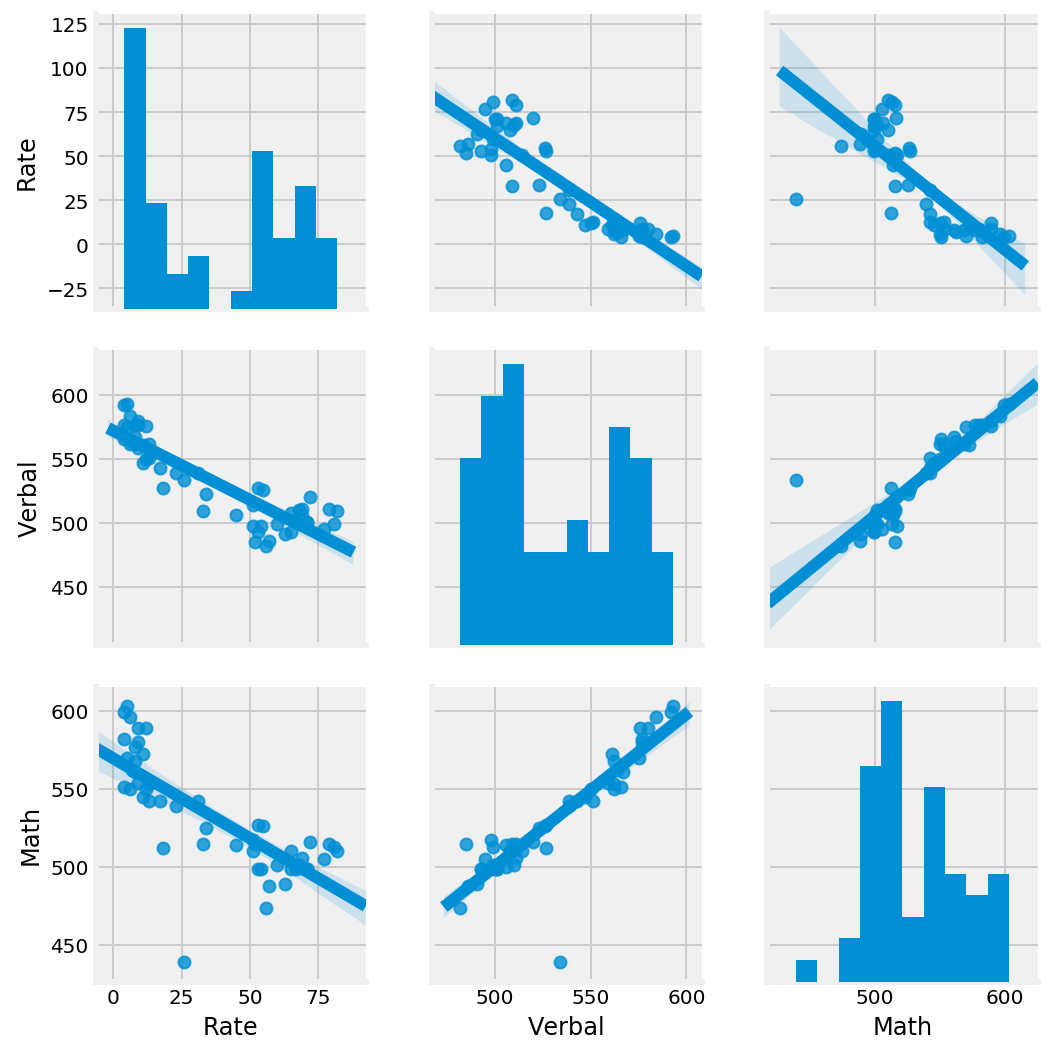

In [104]:
sns.pairplot(sat_df, kind='reg')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

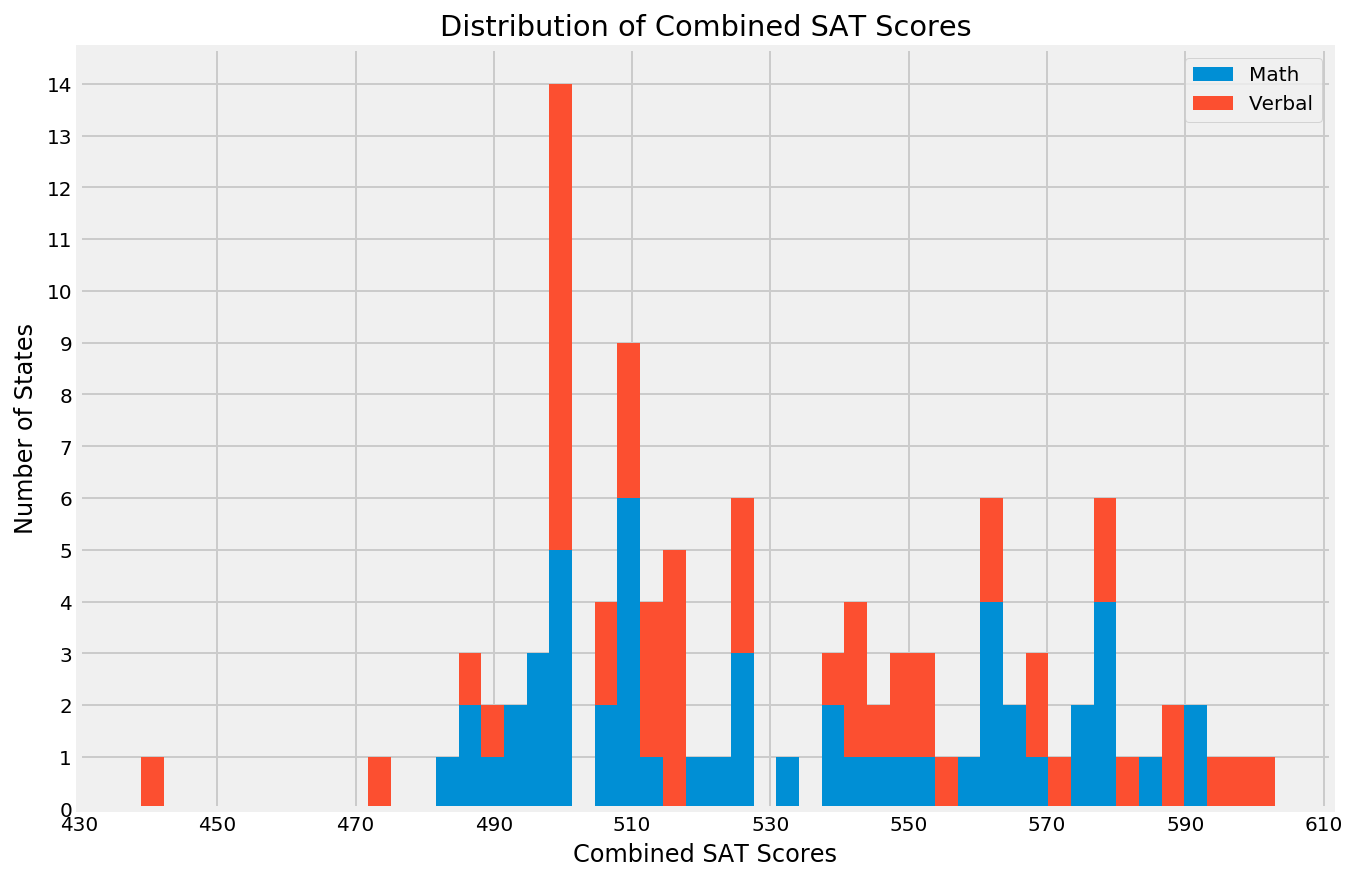

In [85]:
plt.figure(figsize=(10,7))
plt.hist([sat_df['Verbal'], sat_df['Math']], stacked=True, bins=50)
axes = plt.gca()
axes.set_yticks(np.arange(0,15, step=1))
axes.set_xticks(np.arange(430, 620, step=20))
axes.set_ylabel('Number of States')
axes.set_xlabel('Combined SAT Scores')
axes.set_title('Distribution of Combined SAT Scores')
plt.legend(['Math', 'Verbal'])

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0.5, 1.0, 'Comparison of Math and Verbal Scores')

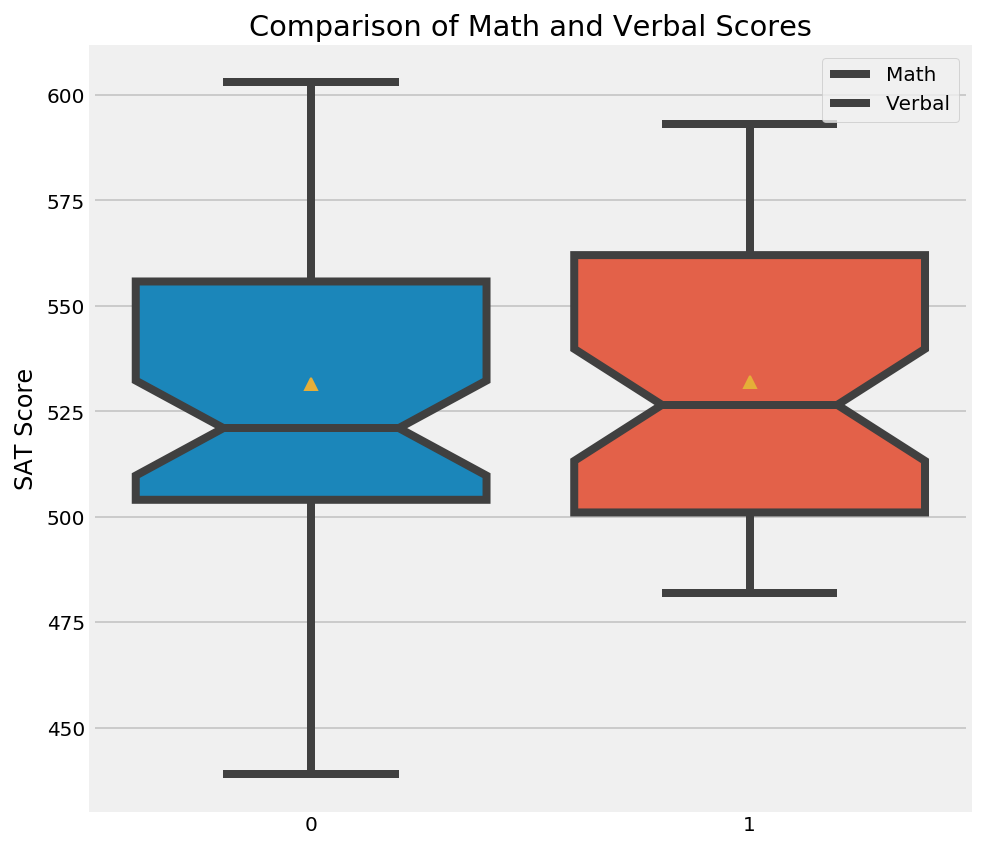

In [103]:
plt.figure(figsize=(7,7))
sns.boxplot(data=[sat_df['Math'], sat_df['Verbal']], notch=True, showmeans=True)
plt.legend(['Math', 'Verbal'])
axes = plt.gca()
#axes.set_xticks(['Math', 'Verbal'])
axes.set_ylabel('SAT Score')
axes.set_title('Comparison of Math and Verbal Scores')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [144]:
from scipy import stats 
numeric_sat_df_frames = pd.DataFrame([sat_df['Verbal'], sat_df['Math'], sat_df['Rate']])

In [145]:
format_zscores = lambda x: stats.zscore(x)
numeric_sat_df_frames = numeric_sat_df_frames.apply(format_zscores)

In [146]:
numeric_sat_df_frames = numeric_sat_df_frames.transpose()

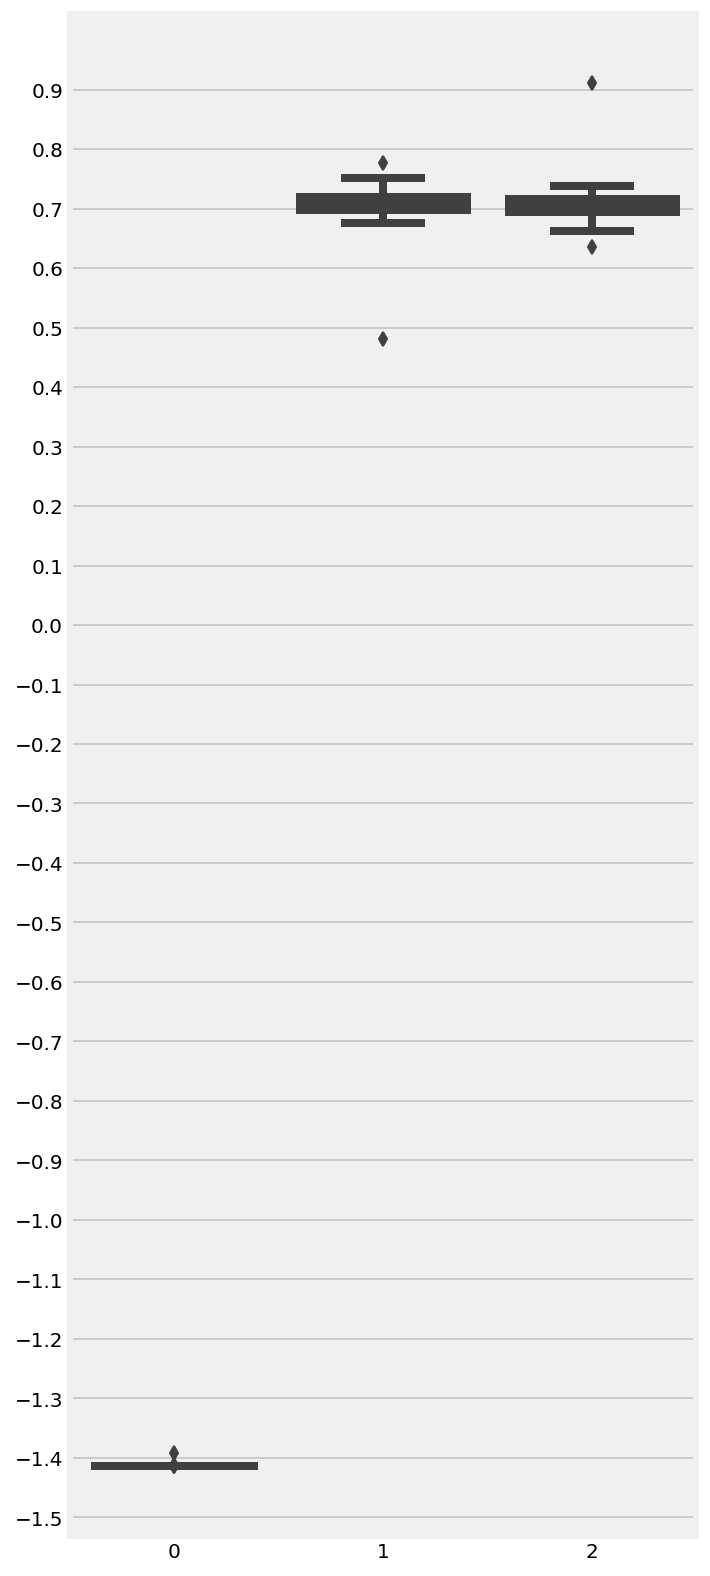

In [166]:
plt.figure(figsize=(5,14))
sns.boxplot(data=[numeric_sat_df_frames['Rate'], numeric_sat_df_frames['Math'],\
                 numeric_sat_df_frames['Verbal']])
axes = plt.gca()
axes.set_yticks(np.arange(-1.5, 1, step=0.1))

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




The distribution of Verbal SAT Scores is bimodal and relatively evenly distributed. The number of states that scored over the mean is 24 out of 51. The green line in the figure below depicts the mean. 

In [174]:
sat_df['Verbal'].mean()

532.0192307692307

In [170]:
len(sat_df[sat_df['Verbal'] > sat_df['Verbal'].mean()])

24

Text(0.5, 1.0, 'Distribution of Verbal Scores')

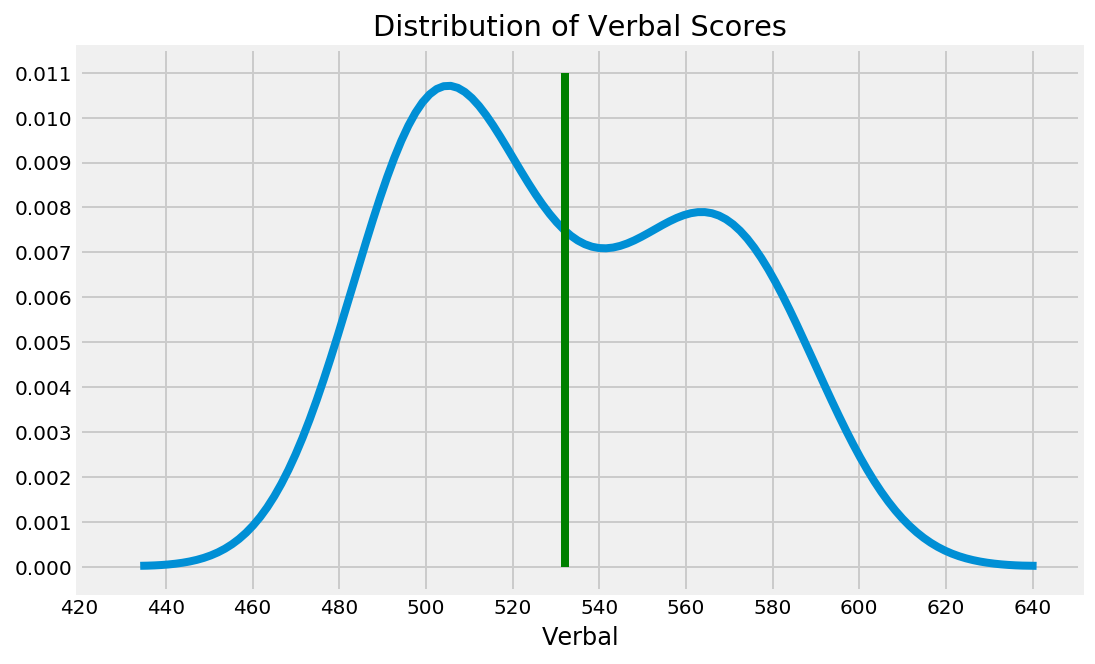

In [268]:
plt.figure(figsize=(8,5))
sns.distplot(sat_df['Verbal'], hist=False)
#plt.axvline(532, 0,0.010)
plt.plot([532, 532], [0, 0.011], c='g')
axes = plt.gca()
axes.set_xticks(np.arange(420, 650, step=20))
axes.set_yticks(np.arange(0.00, 0.012, step=0.001))
axes.set_title('Distribution of Verbal Scores')

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

The median, depicted below in red, is slightly lower than the mean- indicating that there is a positive skew in the data. 

In [203]:
sat_df['Verbal'].median()

526.5

In [204]:
len(sat_df[sat_df['Verbal'] > sat_df['Verbal'].median()])

26

Text(0.5, 1.0, 'Distribution of Verbal Scores')

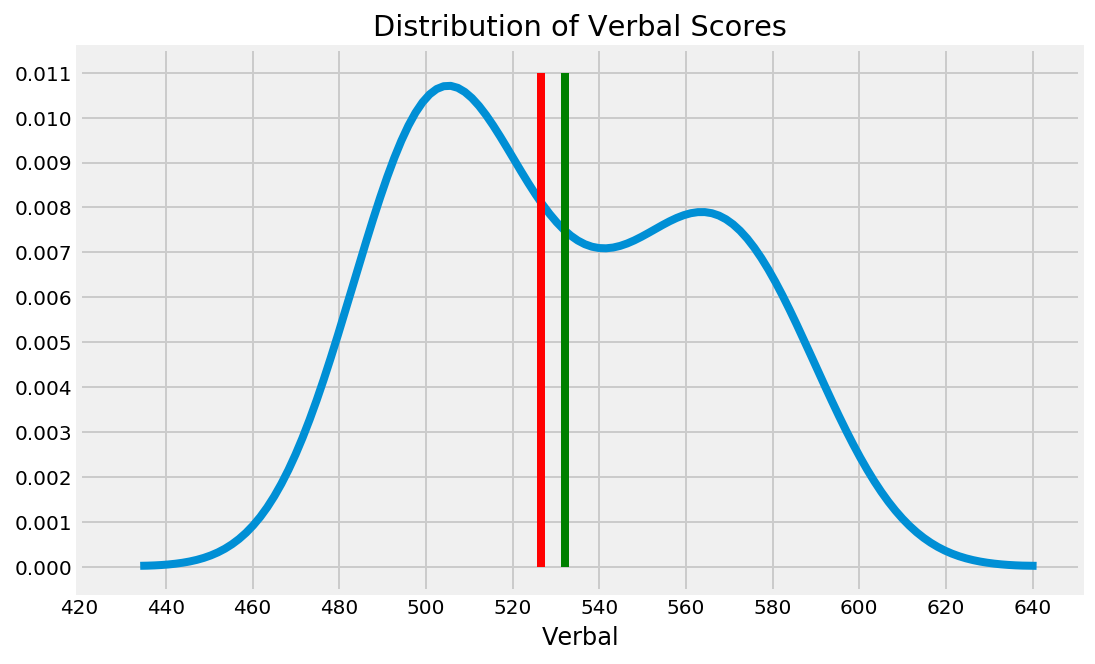

In [273]:
plt.figure(figsize=(8,5))
sns.distplot(sat_df['Verbal'], hist=False)
#plt.axvline(532, 0,0.010)
verbalmedian = plt.plot([526.5, 526.5], [0, 0.011], c='r')
verbalmean = plt.plot([532, 532], [0, 0.011], c='g')
axes = plt.gca()
axes.set_xticks(np.arange(420, 650, step=20))
axes.set_yticks(np.arange(0.00, 0.012, step=0.001))
axes.set_title('Distribution of Verbal Scores')


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [208]:
#Keep in mind- negative numbers in this column mean that the state has higher math scores than verbal scores
sat_df['Score_Difference'] = sat_df['Verbal'] - sat_df['Math']

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [232]:
sat_df = sat_df.sort_values('Score_Difference', axis=0)

In [239]:
#sat_df = sat_df.reset_index()
greater_math_df = sat_df.iloc[0:10]
greater_verbal_df = sat_df.iloc[41:-1]

In [243]:
greater_math_df['Score_Difference'] = greater_math_df['Score_Difference'].abs()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [241]:
print(greater_math_df.shape)
print(greater_verbal_df.shape)

(10, 7)
(10, 7)


In [247]:
#I accidentally ran the reset index multiple times so I'm just doing cleanup here 
greater_math_df.drop(columns=['level_0', 'index'], inplace=True)
greater_verbal_df.drop(columns=['level_0', 'index'], inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [252]:
greater_math_df.head(3)


,State,Rate,Verbal,Math,Score_Difference
0,HI,52,485,515,30
1,CA,51,498,517,19
2,NJ,81,499,513,14


In [251]:
greater_verbal_df.head(3)

,State,Rate,Verbal,Math,Score_Difference
40,VT,69,511,506,5
42,OK,8,567,561,6
43,ME,69,506,500,6


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


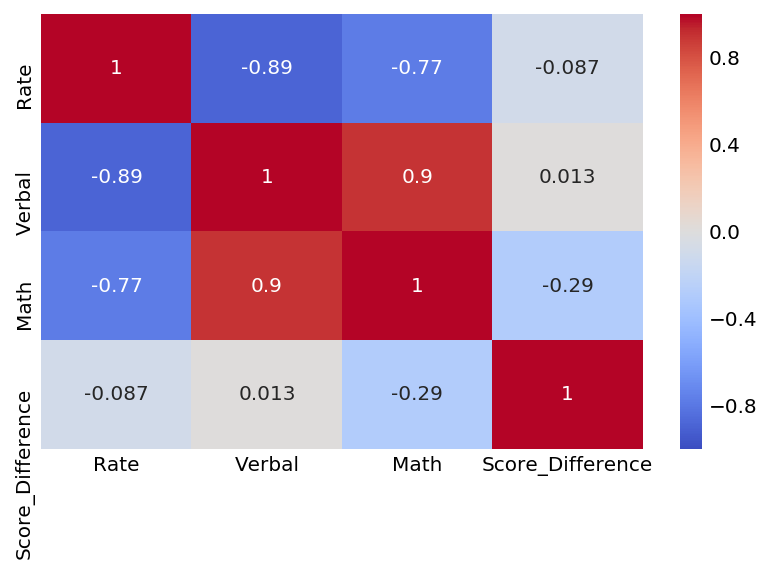

In [254]:
sat_df.drop(columns=['level_0', 'index'], inplace=True)
sns.heatmap(sat_df.corr(), vmin=-1, cmap='coolwarm', annot=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

Count: This describes the number of non-null values. We should not have any null values in this data set so that makes sense. 
Mean: This is the average of each column. 
Std: This is the standard deviation of each column. (Standard deviation is the square root of the variance and is a measure of how spread out the data is.) 
Min: This is the smallest number in the column. 
25%: This is the number at the 25th percentile, meaning if all the numbers in the column are ordered it is the number 25% of the way to the maximum. 
50%: This is the number at the 50th percentile (also called the median)
75%: This is the number at the 75th percentile. 
Max: This is the largest number in the column. 


In [255]:
sat_df.describe()

,Rate,Verbal,Math,Score_Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,5.750000
std,27.301788,33.236225,36.014975,14.628571
min,4.000000,482.000000,439.000000,-7.000000
25%,9.000000,501.000000,504.000000,-1.250000
50%,33.500000,526.500000,521.000000,2.000000
75%,63.500000,562.000000,555.750000,9.000000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

While this dataset does not come with null values inputted as NaN or null, but as a '-' which means that the data types of those columns are objects which we will have to transform to int64 after replacing the '-' with zero. Additionally, the way ages were sampled is, interesting, so to get the most accurate prediction I'm going to have to either merge or break up some age groups. 

In [257]:
drugs_df = pd.read_csv('drug-use-by-age.csv')

In [259]:
drugs_df.head(3).T

,0,1,2
age,12,13,14
n,2798,2757,2792
alcohol-use,3.9,8.5,18.1
alcohol-frequency,3,6,5
marijuana-use,1.1,3.4,8.7
marijuana-frequency,4,15,24
cocaine-use,0.1,0.1,0.1
cocaine-frequency,5.0,1.0,5.5
crack-use,0,0,0
crack-frequency,-,3.0,-


In [263]:
drugs_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [264]:
drugs_df.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [265]:
drugs_df['age'].unique

<bound method Series.unique of 0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
15    50-64
16      65+
Name: age, dtype: object>

In [280]:
drugs_df = drugs_df.apply(lambda x: x.replace('-', '0.0'))

In [281]:
drugs_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [290]:
drugs_df['meth-frequency'] = pd.to_numeric(drugs_df['meth-frequency'])
drugs_df['inhalant-frequency'] = pd.to_numeric(drugs_df['inhalant-frequency'])
drugs_df['oxycontin-frequency'] = pd.to_numeric(drugs_df['oxycontin-frequency'])
drugs_df['meth-frequency'] = pd.to_numeric(drugs_df['meth-frequency'])
drugs_df['heroin-frequency'] = pd.to_numeric(drugs_df['heroin-frequency'])
drugs_df['cocaine-frequency'] = pd.to_numeric(drugs_df['cocaine-frequency'])
drugs_df['crack-frequency'] = pd.to_numeric(drugs_df['crack-frequency'])

In [291]:
drugs_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [266]:
drugsdf.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


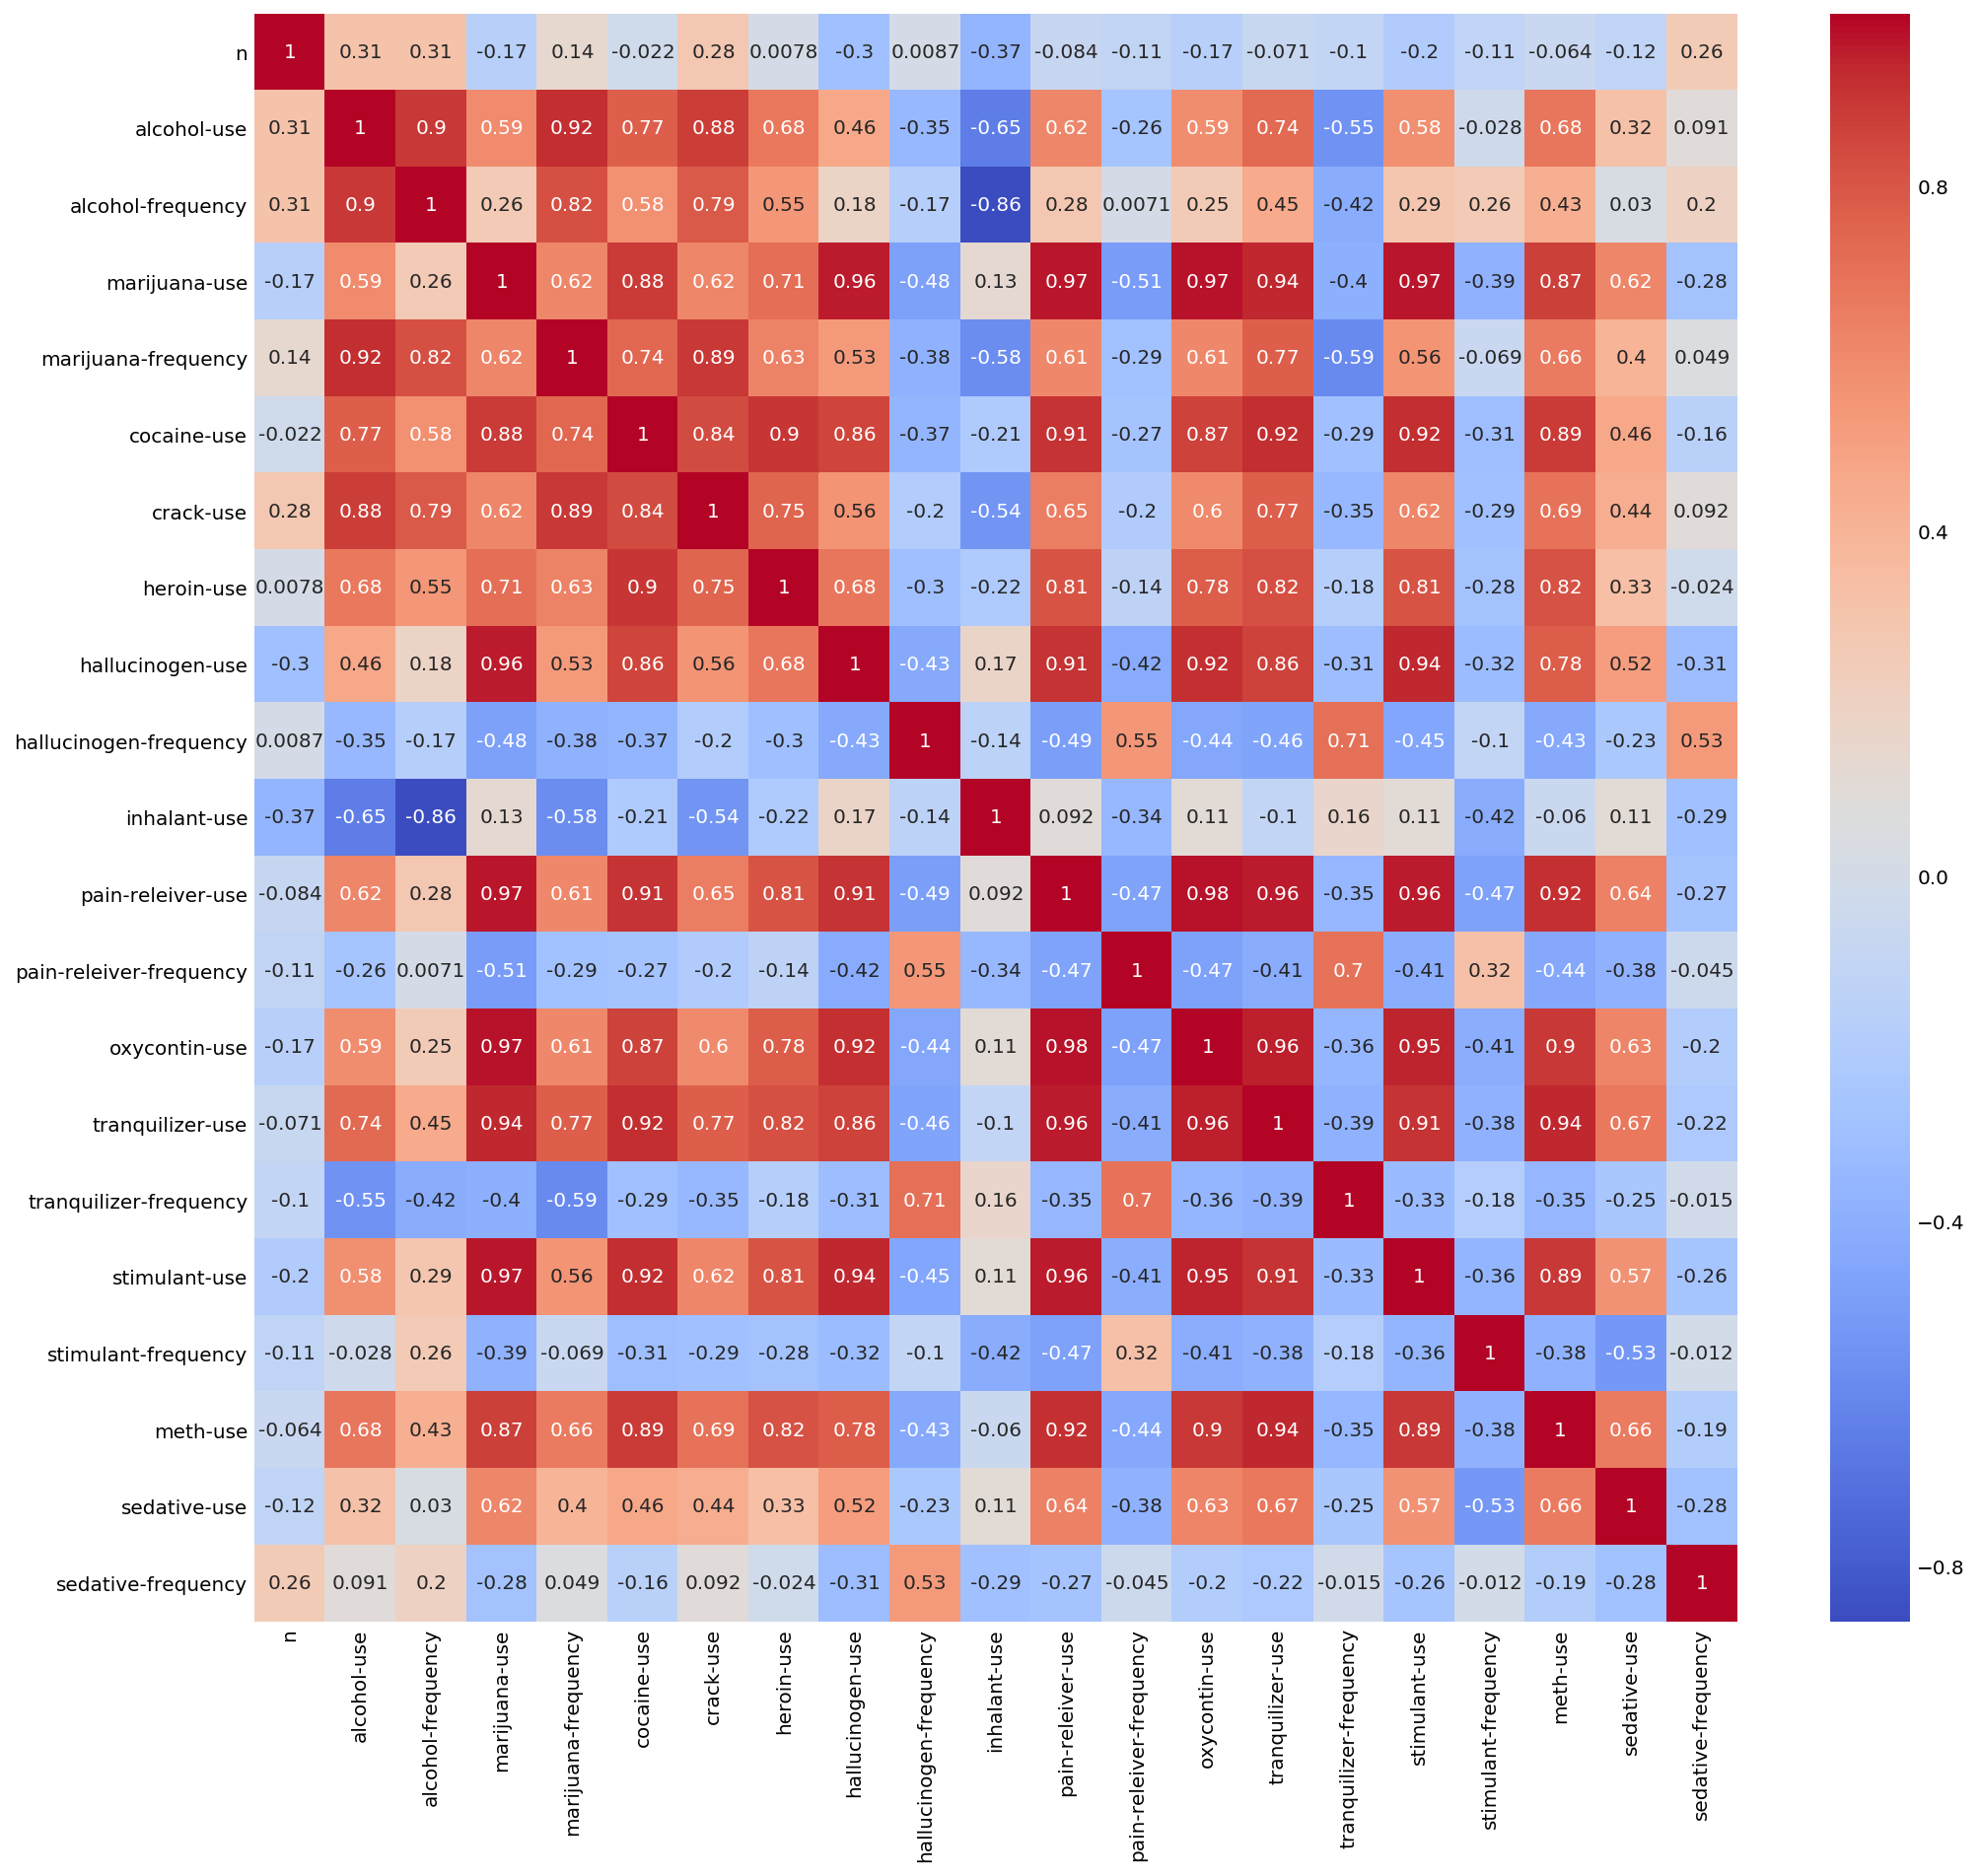

In [267]:
plt.figure(figsize=(15, 15))
sns.heatmap(drugsdf.corr(), cmap='coolwarm', annot=True)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

Question: Does frequency increase with age?
Deliverables: Spearman's rank correlation of age correlated with usage. 


Findings: Alcohol and cannabis had very strong correlations (0.879048 and 0.644758, respectively) with an increase in age and usage. This might be attributed to the legal status or semi-legal status of these substances. We are very confident in the results produced because the p-values for both are below 1%. Interestingly, sedeative use goes down with age (-0.513843 correlation). 

In [297]:
drugs_df.filter(regex = 'use|freq').corr(method='spearman')

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
alcohol-use,1.000000,0.879048,0.529736,0.795855,0.784750,0.333209,0.829994,0.489848,0.757266,0.382587,...,0.533255,0.353591,0.673419,-0.030922,0.577914,0.393590,0.709185,0.355651,0.251228,-0.094711
alcohol-frequency,0.879048,1.000000,0.208460,0.706857,0.470803,0.296839,0.640306,0.480190,0.417035,0.510144,...,0.187253,0.187326,0.360391,-0.126032,0.205996,0.610356,0.403163,0.270459,0.037418,0.011040
marijuana-use,0.529736,0.208460,1.000000,0.644758,0.898591,0.183121,0.672246,0.246004,0.760567,0.200980,...,0.962470,0.044172,0.926381,-0.025959,0.960147,-0.071518,0.854706,0.315532,0.610925,-0.491705
marijuana-frequency,0.795855,0.706857,0.644758,1.000000,0.786578,0.492371,0.867061,0.391033,0.725328,0.455562,...,0.626290,0.289126,0.757087,-0.116764,0.570425,0.328130,0.695994,0.434580,0.415596,-0.242216
cocaine-use,0.784750,0.470803,0.898591,0.786578,1.000000,0.304464,0.870990,0.339914,0.903908,0.224955,...,0.879013,0.337847,0.922463,0.052078,0.917592,0.019790,0.902623,0.332513,0.534143,-0.396424
cocaine-frequency,0.333209,0.296839,0.183121,0.492371,0.304464,1.000000,0.498427,0.356896,0.208735,0.344920,...,0.160608,0.080999,0.230439,-0.027833,0.089107,0.489030,0.197487,0.588074,0.198065,-0.196266
crack-use,0.829994,0.640306,0.672246,0.867061,0.870990,0.498427,1.000000,0.489435,0.796692,0.331030,...,0.632951,0.383701,0.755293,-0.120720,0.661192,0.283756,0.725415,0.409448,0.486870,-0.180073
crack-frequency,0.489848,0.480190,0.246004,0.391033,0.339914,0.356896,0.489435,1.000000,0.180767,0.054121,...,0.229154,0.091133,0.271553,-0.111664,0.227693,0.241337,0.383619,0.346273,0.516699,0.059223
heroin-use,0.757266,0.417035,0.760567,0.725328,0.903908,0.208735,0.796692,0.180767,1.000000,0.092875,...,0.804816,0.356247,0.890303,0.067729,0.820058,-0.037885,0.853162,0.200551,0.457268,-0.189468
heroin-frequency,0.382587,0.510144,0.200980,0.455562,0.224955,0.344920,0.331030,0.054121,0.092875,1.000000,...,0.151386,-0.069939,0.212270,-0.245992,0.064991,0.356357,0.153377,0.581953,0.015178,-0.358945


In [298]:
use=drugs_df.filter(regex = 'use')
freq=drugs_df.filter(regex = 'freq')

In [299]:
l= []
d = {'name':[],'pvalue':[],'correlation':[]}

In [300]:
for col in use.columns:
    if len(col.split('-')[:-1]) ==1:
        result = scipy.stats.spearmanr(use[col.split('-')[0]+'-use'],freq[col.split('-')[0]+'-frequency'])
        d['name'].append(col.split('-')[0])
        d['pvalue'].append(result.pvalue)
        d['correlation'].append(result.correlation)

In [301]:
spearmans = pd.DataFrame(d)

In [302]:
spearmans.set_index('name').sort_values('pvalue')

,pvalue,correlation
name,,
alcohol,0.000003,0.879048
marijuana,0.005201,0.644758
sedative,0.034864,-0.513843
crack,0.046149,0.489435
cocaine,0.234759,0.304464
meth,0.303631,0.265187
hallucinogen,0.389277,-0.223152
inhalant,0.438008,0.201508
stimulant,0.628621,-0.126467
